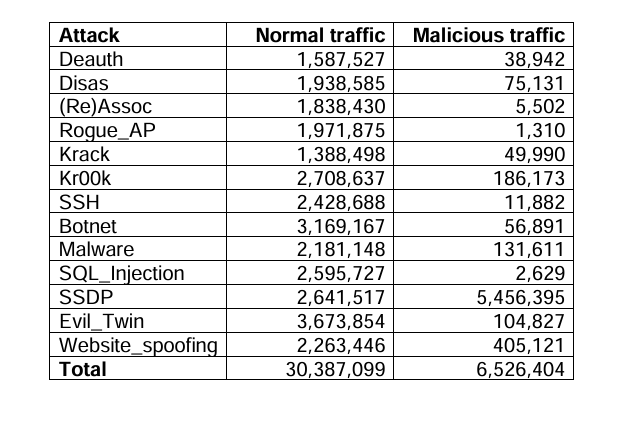


# Processing

In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
# Path to your dataset folder
dataset_folder = r"C:\Users\ulami\Desktop\AWID-to-merge"

# Load and concatenate all CSV files
def load_dataset(folder):
    all_files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith('.csv')]
    dataframes = [pd.read_csv(f, low_memory=False) for f in all_files]
    return pd.concat(dataframes, ignore_index=True)

# Load data
data = load_dataset(dataset_folder)

In [4]:
# merged_df = data
print(data['Label'].value_counts())

Label
Normal              540710
SSDP                 45316
Website_spoofing     13141
Krack                12312
Malware              11988
Disas                 9629
Deauth                8940
Kr00k                 5257
Botnet                1239
SSH                    834
(Re)Assoc              308
SQL_Injection          152
Evil_Twin              101
RogueAP                 67
Name: count, dtype: int64


In [18]:
print(data['BinaryLabel'].value_counts())

BinaryLabel
0    540710
1    109284
Name: count, dtype: int64


In [6]:
data.shape

(649994, 254)

In [5]:
data.head()

,frame.encap_type,frame.len,frame.number,frame.time,frame.time_delta,frame.time_delta_displayed,frame.time_epoch,frame.time_relative,radiotap.channel.flags.cck,radiotap.channel.flags.ofdm,...,tls.app_data_proto,tls.compress_certificate.compressed_certificate_message.length,tls.connection_id,tls.handshake.extension.type,tls.handshake.extensions_key_share_group,tls.handshake.session_ticket_length,tls.handshake.version,tls.record.content_type,tls.record.version,Label
0,23,88,1750001,Dec 18- 2020 19:18:55.062376000 GTB Standard Time,0.000003,0.000003,1608311935,583.023116,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal
1,23,76,1750002,Dec 18- 2020 19:18:55.062499000 GTB Standard Time,0.000123,0.000123,1608311935,583.023239,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal
2,23,70,1750003,Dec 18- 2020 19:18:55.062548000 GTB Standard Time,0.000049,0.000049,1608311935,583.023288,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal
3,23,158,1750004,Dec 18- 2020 19:18:55.062667000 GTB Standard Time,0.000119,0.000119,1608311935,583.023407,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal
4,23,88,1750005,Dec 18- 2020 19:18:55.062670000 GTB Standard Time,0.000003,0.000003,1608311935,583.023410,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal


In [7]:
data = data.drop(columns=['frame.len','frame.time', 'frame.time_relative', 'frame.time_epoch', 'frame.time_delta', 'frame.time_delta_displayed', 'radiotap.timestamp.ts', 'frame.number'])

In [8]:
data = data.drop(columns=['wlan.ra'])

In [11]:
data.isnull().sum()

frame.encap_type               0
radiotap.channel.flags.cck     0
radiotap.channel.flags.ofdm    0
radiotap.channel.freq          0
radiotap.dbm_antsignal         0
radiotap.length                0
radiotap.present.tsft          0
radiotap.rxflags               0
wlan.fc.ds                     0
wlan.fc.frag                   0
wlan.fc.order                  0
wlan.fc.moredata               0
wlan.fc.protected              0
wlan.fc.pwrmgt                 0
wlan.fc.type                   0
wlan.fc.retry                  0
wlan.fc.subtype                0
wlan_radio.duration            0
wlan_radio.channel             0
wlan_radio.data_rate           0
wlan_radio.frequency           0
wlan_radio.signal_dbm          0
wlan_radio.phy                 0
Label                          0
dtype: int64

In [10]:
prev_num_cols = len(data.columns)
data.dropna(axis='columns', inplace=True)
print("Removed " + str(prev_num_cols - len(data.columns)) +
      " columns with all NaN values.")

Removed 221 columns with all NaN values.


In [12]:
data.shape

(649994, 24)

In [13]:
print(data['Label'].value_counts())

Label
Normal              540710
SSDP                 45316
Website_spoofing     13141
Krack                12312
Malware              11988
Disas                 9629
Deauth                8940
Kr00k                 5257
Botnet                1239
SSH                    834
(Re)Assoc              308
SQL_Injection          152
Evil_Twin              101
RogueAP                 67
Name: count, dtype: int64


In [12]:
data.describe(include='object')

,radiotap.present.tsft,radiotap.rxflags,wlan.fc.ds,Label
count,649994,649994,649994,649994
unique,2,1,4,14
top,1-0-0,0x00000000,0x00000000,Normal
freq,381097,649994,377676,540710


# MODEL

In [13]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [14]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].astype(str)
            label_encoder = LabelEncoder()
            df[col] = label_encoder.fit_transform(df[col])

le(data)


In [15]:
print(data['Label'].value_counts())

Label
8     540710
11     45316
13     13141
6      12312
7      11988
3       9629
2       8940
5       5257
1       1239
12       834
0        308
10       152
4        101
9         67
Name: count, dtype: int64


In [16]:
data['BinaryLabel'] = (data['Label'] != 8).astype(int)
print(data['BinaryLabel'].value_counts())

BinaryLabel
0    540710
1    109284
Name: count, dtype: int64


In [17]:
data.head()

,frame.encap_type,radiotap.channel.flags.cck,radiotap.channel.flags.ofdm,radiotap.channel.freq,radiotap.dbm_antsignal,radiotap.length,radiotap.present.tsft,radiotap.rxflags,wlan.fc.ds,wlan.fc.frag,...,wlan.fc.retry,wlan.fc.subtype,wlan_radio.duration,wlan_radio.channel,wlan_radio.data_rate,wlan_radio.frequency,wlan_radio.signal_dbm,wlan_radio.phy,Label,BinaryLabel
0,23,0,1,5180,-179,56,1,0,0,0,...,0,9,28,36,54.000,5180,-56,5,8,0
1,23,0,1,5180,-180,56,1,0,0,0,...,0,11,28,36,24.000,5180,-56,5,8,0
2,23,0,1,5180,-110,56,1,0,0,0,...,0,12,28,36,24.000,5180,-36,5,8,0
3,23,0,1,5180,-168,64,0,0,1,0,...,0,8,44,36,173.333,5180,-53,8,8,0
4,23,0,1,5180,-110,56,1,0,0,0,...,0,9,32,36,24.000,5180,-36,5,8,0


# OPTUNA

In [48]:
import optuna
from optuna.integration import TFKerasPruningCallback
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


X = data.drop(columns=['Label', 'BinaryLabel']).values
y = data['BinaryLabel'].values

X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=1
)

# ---------------------------
# Model factory
# ---------------------------
def create_model(trial, input_dim):
    model = Sequential()
    n_layers = trial.suggest_int("n_layers", 2, 6)
    for i in range(n_layers):
        units = trial.suggest_categorical(f"n_units_l{i}", [8, 16, 32, 64])
        dropout_rate = trial.suggest_categorical(f"dropout_l{i}", [0.0, 0.1, 0.2])

        if i == 0:
            model.add(Dense(units, activation='relu', input_shape=(input_dim,)))
        else:
            model.add(Dense(units, activation='relu'))

        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# ---------------------------
# 2) Optuna objective with Stratified K-Fold on trainval
#    + collect out-of-fold predictions to build one CV report per trial
# ---------------------------
trial_reports = []

def objective(trial):
    n_epochs   = trial.suggest_int("epochs", 5, 10)

    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

    # Out-of-fold (OOF) predictions aligned to y_trainval
    oof_pred = np.full(shape=y_trainval.shape[0], fill_value=np.nan, dtype=float)

    fold_f1s = []
    folds_meta = []
    for fold_idx, (tr_idx, va_idx) in enumerate(skf.split(X_trainval, y_trainval), start=1):
        X_tr, X_va = X_trainval[tr_idx], X_trainval[va_idx]
        y_tr, y_va = y_trainval[tr_idx], y_trainval[va_idx]

        scaler = StandardScaler()
        X_tr = scaler.fit_transform(X_tr)
        X_va = scaler.transform(X_va)

        model = create_model(trial, input_dim=X_tr.shape[1])

        early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=0)
        pruning_cb = TFKerasPruningCallback(trial, "val_accuracy")

        model.fit(
            X_tr, y_tr,
            validation_data=(X_va, y_va),
            epochs=n_epochs,
            batch_size=32,
            verbose=0,
            callbacks=[early_stop, pruning_cb]
        )

        va_prob = model.predict(X_va, verbose=1).ravel()
        oof_pred[va_idx] = va_prob
        va_pred = (va_prob > 0.5).astype(int)

        rep = classification_report(y_va, va_pred, output_dict=True, zero_division=0)
        f1_macro = rep['macro avg']['f1-score']
        fold_f1s.append(f1_macro)
        folds_meta.append({'fold': fold_idx, 'f1_macro': float(f1_macro)})

        trial.report(np.mean(fold_f1s), step=fold_idx)
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    # Build ONE report per trial from OOF predictions (same structure you used before)
    assert not np.isnan(oof_pred).any(), "OOF predictions not fully filled"
    oof_label = (oof_pred > 0.5).astype(int)
    cv_report = classification_report(y_trainval, oof_label, output_dict=True, zero_division=0)

    # Save exactly the fields your flattening code expects
    trial_reports.append({
        'trial_number': trial.number,
        'params': trial.params,
        'report': cv_report,   # has keys: 'accuracy', 'macro avg', '0', '1', ...
        'folds': folds_meta,
        'mean_f1_macro': float(np.mean(fold_f1s))
    })

    return float(np.mean(fold_f1s))

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best params:", study.best_trial.params)
print(f"Best CV macro F1: {study.best_value:.4f}")


[I 2025-08-24 01:26:38,187] A new study created in memory with name: no-name-0eb5952f-c7ca-468a-83f7-63d8acf1ef13
C:\Users\ulami\anaconda3\envs\tf_env\lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning:

invalid value encountered in divide

C:\Users\ulami\anaconda3\envs\tf_env\lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning:

invalid value encountered in divide

C:\Users\ulami\anaconda3\envs\tf_env\lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning:

invalid value encountered in divide

C:\Users\ulami\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5417/5417 ━━━━━━━━━━━━━━━━━━━━ 5s 938us/step


C:\Users\ulami\anaconda3\envs\tf_env\lib\site-packages\optuna\trial\_trial.py:497: UserWarning:

The reported value is ignored because this `step` 1 is already reported.

C:\Users\ulami\anaconda3\envs\tf_env\lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning:

invalid value encountered in divide

C:\Users\ulami\anaconda3\envs\tf_env\lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning:

invalid value encountered in divide

C:\Users\ulami\anaconda3\envs\tf_env\lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning:

invalid value encountered in divide

C:\Users\ulami\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

C:\Users\ulami\anaconda3\envs\tf_env\lib\site-packages\optuna\trial\_trial.py:497: UserWarning:

The reported value is ignored becaus

5417/5417 ━━━━━━━━━━━━━━━━━━━━ 5s 928us/step


C:\Users\ulami\anaconda3\envs\tf_env\lib\site-packages\optuna\trial\_trial.py:497: UserWarning:

The reported value is ignored because this `step` 2 is already reported.

C:\Users\ulami\anaconda3\envs\tf_env\lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning:

invalid value encountered in divide

C:\Users\ulami\anaconda3\envs\tf_env\lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning:

invalid value encountered in divide

C:\Users\ulami\anaconda3\envs\tf_env\lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning:

invalid value encountered in divide

C:\Users\ulami\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

C:\Users\ulami\anaconda3\envs\tf_env\lib\site-packages\optuna\trial\_trial.py:497: UserWarning:

The reported value is ignored becaus

5417/5417 ━━━━━━━━━━━━━━━━━━━━ 5s 911us/step


C:\Users\ulami\anaconda3\envs\tf_env\lib\site-packages\optuna\trial\_trial.py:497: UserWarning:

The reported value is ignored because this `step` 3 is already reported.

[I 2025-08-24 01:34:43,508] Trial 0 finished with value: 0.4541095969502395 and parameters: {'epochs': 9, 'n_layers': 6, 'n_units_l0': 8, 'dropout_l0': 0.1, 'n_units_l1': 64, 'dropout_l1': 0.2, 'n_units_l2': 8, 'dropout_l2': 0.0, 'n_units_l3': 16, 'dropout_l3': 0.2, 'n_units_l4': 16, 'dropout_l4': 0.1, 'n_units_l5': 32, 'dropout_l5': 0.2}. Best is trial 0 with value: 0.4541095969502395.
C:\Users\ulami\anaconda3\envs\tf_env\lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning:

invalid value encountered in divide

C:\Users\ulami\anaconda3\envs\tf_env\lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning:

invalid value encountered in divide

C:\Users\ulami\anaconda3\envs\tf_env\lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning:

invalid value encountered in divide

C:\Users\ulami\anac

5417/5417 ━━━━━━━━━━━━━━━━━━━━ 5s 890us/step


C:\Users\ulami\anaconda3\envs\tf_env\lib\site-packages\optuna\trial\_trial.py:497: UserWarning:

The reported value is ignored because this `step` 1 is already reported.

C:\Users\ulami\anaconda3\envs\tf_env\lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning:

invalid value encountered in divide

C:\Users\ulami\anaconda3\envs\tf_env\lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning:

invalid value encountered in divide

C:\Users\ulami\anaconda3\envs\tf_env\lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning:

invalid value encountered in divide

C:\Users\ulami\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

C:\Users\ulami\anaconda3\envs\tf_env\lib\site-packages\optuna\trial\_trial.py:497: UserWarning:

The reported value is ignored becaus

KeyboardInterrupt: 

In [40]:

flattened_reports = []
for entry in trial_reports:
    flat = {
        'trial_number': entry['trial_number'],
        **entry['params'],
        'accuracy': entry['report']['accuracy'],
        'macro_f1': entry['report']['macro avg']['f1-score'],
        'macro_precision': entry['report']['macro avg']['precision'],
        'macro_recall': entry['report']['macro avg']['recall'],
        'class_0_f1': entry['report']['0']['f1-score'],
        'class_1_f1': entry['report']['1']['f1-score']
    }
    flattened_reports.append(flat)

df_reports = pd.DataFrame(flattened_reports)
df_reports.to_csv('optuna_AWID3_classification_reports.csv', index=False)

print("Zapisano raporty do: optuna_AWID3_classification_reports.csv")


Zapisano raporty do: optuna_AWID3_classification_reports.csv


In [41]:
scaler_full = StandardScaler().fit(X_trainval)
X_trainval_scaled = scaler_full.transform(X_trainval)
X_test_scaled = scaler_full.transform(X_test)

best_model = create_model(study.best_trial, input_dim=X_trainval_scaled.shape[1])
best_model.fit(
    X_trainval_scaled, y_trainval,
    epochs=study.best_trial.params['epochs'],
    batch_size=32,
    verbose=0
)

y_test_pred = (best_model.predict(X_test_scaled, verbose=1).ravel() > 0.5).astype(int)
final_report = classification_report(y_test, y_test_pred, zero_division=0)
print("Final Test Set Report:")
print(final_report)

C:\Users\ulami\anaconda3\envs\tf_env\lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\ulami\anaconda3\envs\tf_env\lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\ulami\anaconda3\envs\tf_env\lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
C:\Users\ulami\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4063/4063 ━━━━━━━━━━━━━━━━━━━━ 4s 897us/step
Final Test Set Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91    108142
           1       0.00      0.00      0.00     21857

    accuracy                           0.83    129999
   macro avg       0.42      0.50      0.45    129999
weighted avg       0.69      0.83      0.76    129999



In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')

# Print results
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Precision: {precision * 100:.2f}%")
print(f"Test Recall: {recall * 100:.2f}%")


Test Accuracy: 83.19%
Test Precision: 69.20%
Test Recall: 83.19%


C:\Users\ulami\anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


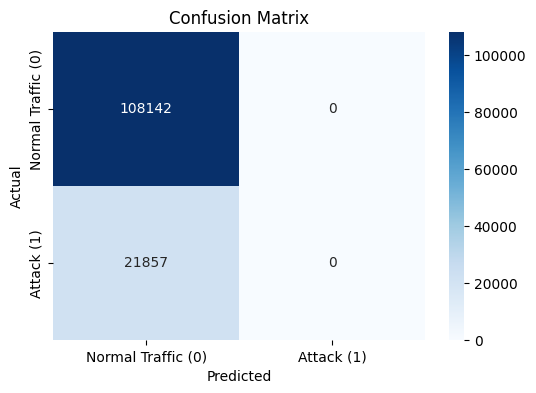

                precision    recall  f1-score   support

Normal Traffic       0.83      1.00      0.91    108142
        Attack       0.00      0.00      0.00     21857

      accuracy                           0.83    129999
     macro avg       0.42      0.50      0.45    129999
  weighted avg       0.69      0.83      0.76    129999



C:\Users\ulami\anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ulami\anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ulami\anaconda3\envs\tf_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal Traffic (0)', 'Attack (1)'], yticklabels=['Normal Traffic (0)', 'Attack (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print detailed classification report
print(classification_report(y_test, y_test_pred, target_names=['Normal Traffic', 'Attack']))


In [44]:
import optuna.visualization as vis

In [45]:
fig1 = optuna.visualization.plot_optimization_history(study)
fig1.show()

In [46]:
optuna.visualization.plot_param_importances(study).show()


In [47]:
fig3 = optuna.visualization.plot_parallel_coordinate(study)
fig3.show()

fig4 = optuna.visualization.plot_slice(study)
fig4.show()

# Feature Selection with Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

X_df = data.drop(columns=['Label', 'BinaryLabel'])  # Keep as DataFrame
y = data['BinaryLabel']

# Train a Random Forest model for feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_df, y)
feature_importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_df.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
17,wlan_radio.duration,0.253503
4,radiotap.dbm_antsignal,0.174581
21,wlan_radio.signal_dbm,0.167065
19,wlan_radio.data_rate,0.090761
14,wlan.fc.type,0.070599
8,wlan.fc.ds,0.036690
16,wlan.fc.subtype,0.034078
20,wlan_radio.frequency,0.031801
3,radiotap.channel.freq,0.028685
18,wlan_radio.channel,0.025510


In [73]:
print(len(feature_importance_df))
print(len(X_df.columns))

23
23


In [64]:
# ----- Your fixed best hyperparameters -----
best_params = {
    'epochs': 6,
    'n_layers': 5,
    'n_units_l0': 64, 'dropout_l0': 0.0,
    'n_units_l1': 64, 'dropout_l1': 0.0,
    'n_units_l2': 64, 'dropout_l2': 0.0,
    'n_units_l3': 64, 'dropout_l3': 0.0,
    'n_units_l4': 64, 'dropout_l4': 0.0,
    'learning_rate': 1e-3,
    'batch_size': 32
}

Best k = 10 with mean CV macro F1 = 0.9740


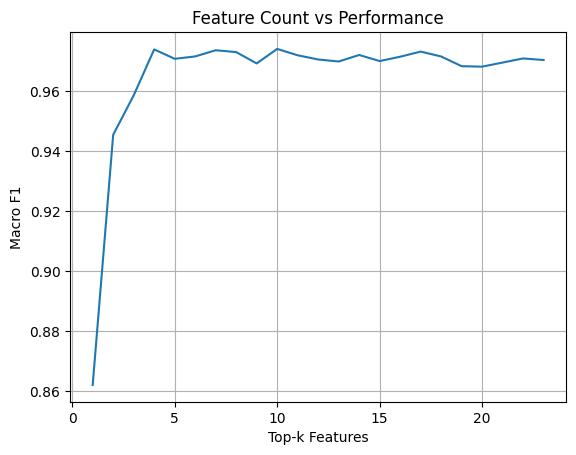

Selected features: ['wlan_radio.duration', 'radiotap.dbm_antsignal', 'wlan_radio.signal_dbm', 'wlan_radio.data_rate', 'wlan.fc.type', 'wlan.fc.ds', 'wlan.fc.subtype', 'wlan_radio.frequency', 'radiotap.channel.freq', 'wlan_radio.channel']
Final Test Set Report (using best_k features):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    108142
           1       0.96      0.96      0.96     21857

    accuracy                           0.99    129999
   macro avg       0.98      0.98      0.98    129999
weighted avg       0.99      0.99      0.99    129999



In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


# ----- Split once: trainval / test -----
X_df = data.drop(columns=['Label', 'BinaryLabel'])
y = data['BinaryLabel'].values

X_trainval_df, X_test_df, y_trainval, y_test = train_test_split(
    X_df, y, test_size=0.2, stratify=y, random_state=1
)

# ----- Model builder using your fixed params -----
def build_model(input_dim: int):
    m = Sequential()
    m.add(Input(shape=(input_dim,)))
    for i in range(best_params['n_layers']):
        units = best_params.get(f"n_units_l{i}")
        dr = best_params.get(f"dropout_l{i}", 0.0)
        m.add(Dense(units, activation='relu'))
        if dr and dr > 0:
            m.add(Dropout(dr))
    m.add(Dense(1, activation='sigmoid'))
    m.compile(optimizer=Adam(learning_rate=best_params['learning_rate']),
              loss='binary_crossentropy', metrics=['accuracy'])
    return m

# ----- Prepare top-k feature order (from your RandomForest importances) -----
top_features = (
    feature_importance_df.sort_values('Importance', ascending=False)['Feature']
    .tolist()
)
top_features = [f for f in top_features if f in X_trainval_df.columns]
max_k = len(top_features)

# ----- CV eval for a given k (on trainval only; scaling inside each fold) -----
def cv_macro_f1_for_k(k: int, seed: int = 1, val_size: float = 0.2):
    feats = top_features[:k]
    Xk = X_trainval_df[feats].values
    yk = y_trainval

    # single stratified hold-out split (no cross-validation)
    X_tr, X_va, y_tr, y_va = train_test_split(
        Xk, yk, test_size=val_size, stratify=yk, random_state=seed
    )

    scaler = StandardScaler().fit(X_tr)
    X_tr = scaler.transform(X_tr)
    X_va = scaler.transform(X_va)

    model = build_model(input_dim=X_tr.shape[1])
    early = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=0)

    model.fit(
        X_tr, y_tr,
        validation_data=(X_va, y_va),
        epochs=best_params['epochs'],
        batch_size=best_params['batch_size'],
        verbose=0,
        callbacks=[early]
    )

    preds = (model.predict(X_va, verbose=0).ravel() > 0.5).astype(int)
    rep = classification_report(y_va, preds, output_dict=True, zero_division=0)
    f1 = rep['macro avg']['f1-score']

    # No CV: return f1 and 0.0 for std to preserve signature compatibility
    return float(f1), 0.0


# ----- Search k = 1..max_k -----
results = []
for k in range(1, max_k + 1):
    mean_f1, std_f1 = cv_macro_f1_for_k(k)
    results.append({'k': k, 'mean_macro_f1': mean_f1, 'std_macro_f1': std_f1})

df_k = pd.DataFrame(results)
best_row = df_k.iloc[df_k['mean_macro_f1'].idxmax()]
best_k = int(best_row['k'])
print(f"Best k = {best_k} with mean CV macro F1 = {best_row['mean_macro_f1']:.4f}")

# ----- Plot performance vs k -----
plt.figure()
plt.plot(df_k['k'], df_k['mean_macro_f1'])
plt.xlabel('Top-k Features')
plt.ylabel('Macro F1')
plt.title('Feature Count vs Performance')
plt.grid(True)
plt.show()

# ----- Final train on all trainval with best_k features; evaluate once on test -----
selected_features = top_features[:best_k]
print("Selected features:", selected_features)

Xtr_sel = X_trainval_df[selected_features].values
Xte_sel = X_test_df[selected_features].values

scaler_full = StandardScaler().fit(Xtr_sel)
Xtr_sel = scaler_full.transform(Xtr_sel)
Xte_sel = scaler_full.transform(Xte_sel)

final_model = build_model(input_dim=Xtr_sel.shape[1])
final_model.fit(
    Xtr_sel, y_trainval,
    epochs=best_params['epochs'],
    batch_size=best_params['batch_size'],
    verbose=0
)

test_preds = (final_model.predict(Xte_sel, verbose=0).ravel() > 0.5).astype(int)
final_report = classification_report(y_test, test_preds, zero_division=0)
print("Final Test Set Report (using best_k features):")
print(final_report)


# WYBRANE 5 NAJWAŻNIEJSZYCH CECH

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [66]:
X_df = data.drop(columns=['Label', 'BinaryLabel'])
y = data['BinaryLabel'].values

X_trainval_df, X_test_df, y_trainval, y_test = train_test_split(
    X_df, y, test_size=0.2, stratify=y, random_state=1
)

# ----- Model builder using your fixed params -----
def build_model(input_dim: int):
    m = Sequential()
    m.add(Input(shape=(input_dim,)))
    for i in range(best_params['n_layers']):
        units = best_params.get(f"n_units_l{i}")
        dr = best_params.get(f"dropout_l{i}", 0.0)
        m.add(Dense(units, activation='relu'))
        if dr and dr > 0:
            m.add(Dropout(dr))
    m.add(Dense(1, activation='sigmoid'))
    m.compile(optimizer=Adam(learning_rate=best_params['learning_rate']),
              loss='binary_crossentropy', metrics=['accuracy'])
    return m

In [75]:
# ----- Final train on all trainval with best_k features; evaluate once on test -----
selected_features = top_features[:4]
print("Selected features:", selected_features)

Xtr_sel = X_trainval_df[selected_features].values
Xte_sel = X_test_df[selected_features].values

scaler_full = StandardScaler().fit(Xtr_sel)
Xtr_sel = scaler_full.transform(Xtr_sel)
Xte_sel = scaler_full.transform(Xte_sel)

final_model = build_model(input_dim=Xtr_sel.shape[1])
final_model.fit(
    Xtr_sel, y_trainval,
    epochs=best_params['epochs'],
    batch_size=best_params['batch_size'],
    verbose=1
)

test_preds = (final_model.predict(Xte_sel, verbose=1).ravel() > 0.5).astype(int)
final_report = classification_report(y_test, test_preds, zero_division=0)
print("Final Test Set Report (using best_k features):")
print(final_report)

Selected features: ['wlan_radio.duration', 'radiotap.dbm_antsignal', 'wlan_radio.signal_dbm', 'wlan_radio.data_rate']
Epoch 1/6
16250/16250 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.9425 - loss: 0.1347
Epoch 2/6
16250/16250 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.9756 - loss: 0.0663
Epoch 3/6
16250/16250 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.9790 - loss: 0.0567
Epoch 4/6
16250/16250 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.9804 - loss: 0.0519
Epoch 5/6
16250/16250 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.9827 - loss: 0.0468
Epoch 6/6
16250/16250 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.9830 - loss: 0.0455
4063/4063 ━━━━━━━━━━━━━━━━━━━━ 4s 918us/step
Final Test Set Report (using best_k features):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    108142
           1       0.97      0.95      0.96     21857

    accuracy                           0.99    129999
   macro avg       0.98      0.9

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Calculate metrics
accuracy = accuracy_score(y_test, test_preds)
precision = precision_score(y_test, test_preds, average='weighted')  # Use 'macro' or 'micro' for different averaging
recall = recall_score(y_test, test_preds, average='weighted')

# Print results
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Precision: {precision * 100:.2f}%")
print(f"Test Recall: {recall * 100:.2f}%")


Test Accuracy: 98.63%
Test Precision: 98.62%
Test Recall: 98.63%


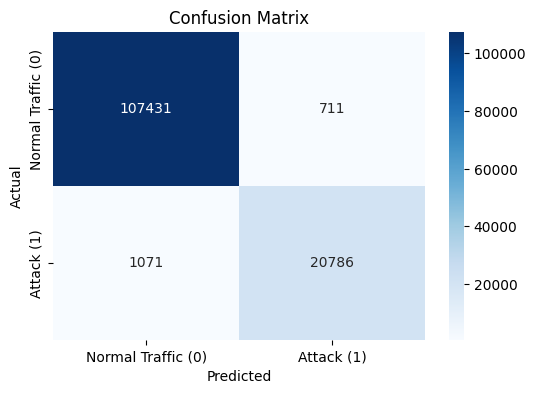

                precision    recall  f1-score   support

Normal Traffic       0.99      0.99      0.99    108142
        Attack       0.97      0.95      0.96     21857

      accuracy                           0.99    129999
     macro avg       0.98      0.97      0.98    129999
  weighted avg       0.99      0.99      0.99    129999



In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix
cm = confusion_matrix(y_test, test_preds)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal Traffic (0)', 'Attack (1)'], yticklabels=['Normal Traffic (0)', 'Attack (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print detailed classification report
print(classification_report(y_test, test_preds, target_names=['Normal Traffic', 'Attack']))


In [90]:
# Save the trained model
final_model.save("AWID_csv_final2.keras")

In [20]:
from tensorflow.keras.models import load_model
final_model = load_model(r"C:\Users\ulami\Desktop\magisterka\models_final\AWID_csv_final2.keras")   

# FGSM

In [35]:

# Separate attack and normal samples
X_test_attack = Xte_sel[y_test == 1]
y_test_attack = y_test[y_test == 1]

X_test_normal = Xte_sel[y_test == 0]
y_test_normal = y_test[y_test == 0]

In [79]:
import tensorflow as tf
import numpy as np

# Convert to tensors
X_attack_tensor = tf.convert_to_tensor(X_test_attack, dtype=tf.float32)
y_attack_tensor = tf.convert_to_tensor(y_test_attack.astype(np.float32))

# FGSM
def fgsm_attack(model, X, y, epsilon):
    with tf.GradientTape() as tape:
        tape.watch(X)
        predictions = model(X)
        loss = tf.keras.losses.binary_crossentropy(tf.reshape(y, (-1, 1)), predictions)
    gradient = tape.gradient(loss, X)
     # Print gradient statistics
    print("Gradient stats:")
    print("  Min:", tf.reduce_min(gradient).numpy())
    print("  Max:", tf.reduce_max(gradient).numpy())
    print("  Mean:", tf.reduce_mean(gradient).numpy()) 
    avg_abs_grad = tf.reduce_mean(tf.abs(gradient), axis=0)
    print("Avg abs gradient per feature:", avg_abs_grad.numpy())
    signed_grad = tf.sign(gradient)
    X_adv = X + epsilon * signed_grad
    return X_adv.numpy()

# Generate adversarial attack examples
epsilon = 0.1
X_attack_adv = fgsm_attack(final_model, X_attack_tensor, y_attack_tensor, epsilon=epsilon)

# Combine normal and adversarial attack samples back together
X_test_combined = np.vstack((X_test_normal, X_attack_adv))
y_test_combined = np.hstack((y_test_normal, y_test_attack))

# shuffle the test set
from sklearn.utils import shuffle
X_test_adv_final, y_test_adv_final = shuffle(X_test_combined, y_test_combined, random_state=1)

Gradient stats:
  Min: -188.42493
  Max: 222.28595
  Mean: 0.5327792
Avg abs gradient per feature: [3.236866   2.027168   1.7765185  0.37426937]


In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Get predictions
y_pred = final_model.predict(X_test_adv_final)
y_pred = (y_pred > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test_adv_final, y_pred)
precision = precision_score(y_test_adv_final, y_pred, average='weighted')
recall = recall_score(y_test_adv_final, y_pred, average='weighted')

# Print results
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Precision: {precision * 100:.2f}%")
print(f"Test Recall: {recall * 100:.2f}%")


4063/4063 ━━━━━━━━━━━━━━━━━━━━ 4s 882us/step
Test Accuracy: 86.23%
Test Precision: 86.30%
Test Recall: 86.23%


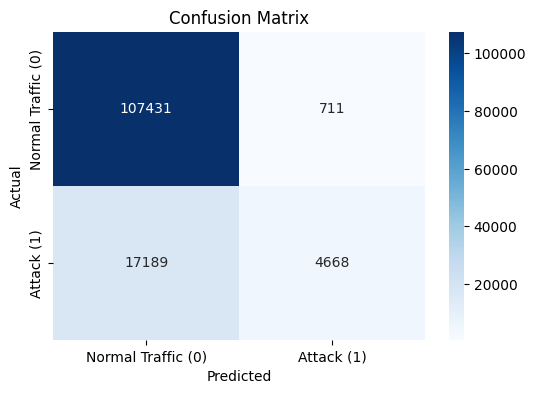

                precision    recall  f1-score   support

Normal Traffic       0.86      0.99      0.92    108142
        Attack       0.87      0.21      0.34     21857

      accuracy                           0.86    129999
     macro avg       0.86      0.60      0.63    129999
  weighted avg       0.86      0.86      0.83    129999



In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix
cm = confusion_matrix(y_test_adv_final, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal Traffic (0)', 'Attack (1)'], yticklabels=['Normal Traffic (0)', 'Attack (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print detailed classification report
print(classification_report(y_test_adv_final, y_pred, target_names=['Normal Traffic', 'Attack']))


In [82]:
import numpy as np
import pandas as pd

# Predictions on the (scaled) originals and adversarials
p_orig_attack = final_model.predict(X_test_attack, verbose=0).ravel()
p_adv_attack  = final_model.predict(X_attack_adv,  verbose=0).ravel()

orig_pred = (p_orig_attack > 0.5).astype(int)
adv_pred  = (p_adv_attack  > 0.5).astype(int)

# Masks for transitions
mask_1_to_0 = (orig_pred == 1) & (adv_pred == 0)  # attack → normal
mask_0_to_1 = (orig_pred == 0) & (adv_pred == 1)  # normal → attack (on the same attack samples)

n_1_to_0 = int(mask_1_to_0.sum())
n_0_to_1 = int(mask_0_to_1.sum())

# Optional: unchanged counts
n_1_to_1 = int(((orig_pred == 1) & (adv_pred == 1)).sum())
n_0_to_0 = int(((orig_pred == 0) & (adv_pred == 0)).sum())

total = len(orig_pred)

print(f"Total attack samples: {total}")
print(f"Flipped 1→0 (attack→normal): {n_1_to_0} ({n_1_to_0/total:.2%})")
print(f"Flipped 0→1 (normal→attack): {n_0_to_1} ({n_0_to_1/total:.2%})")
print(f"Stayed 1→1: {n_1_to_1} ({n_1_to_1/total:.2%})")
print(f"Stayed 0→0: {n_0_to_0} ({n_0_to_0/total:.2%})")

# Optional: a tidy 2×2 table of transitions
transition = pd.crosstab(pd.Series(orig_pred, name="orig"),
                         pd.Series(adv_pred,  name="adv"))
print("\nTransition table (orig → adv):\n", transition)


Total attack samples: 21857
Flipped 1→0 (attack→normal): 16162 (73.94%)
Flipped 0→1 (normal→attack): 44 (0.20%)
Stayed 1→1: 4624 (21.16%)
Stayed 0→0: 1027 (4.70%)

Transition table (orig → adv):
 adv       0     1
orig             
0      1027    44
1     16162  4624


In [83]:
import numpy as np
import pandas as pd

column_names = selected_features

# --- Predict on scaled inputs (no inverse-transform for prediction) ---
p_orig_attack = final_model.predict(X_test_attack, verbose=0).ravel()
p_adv_attack  = final_model.predict(X_attack_adv,  verbose=0).ravel()

orig_pred = (p_orig_attack > 0.5).astype(int)
adv_pred  = (p_adv_attack  > 0.5).astype(int)

# --- Find flips: 1 -> 0 ---
idx_flip = np.where((orig_pred == 1) & (adv_pred == 0))[0]
print(f"Total attack samples: {len(X_test_attack)}")
print(f"Flipped (1→0): {len(idx_flip)}")

if idx_flip.size == 0:
    print("No examples flipped from attack (1) to normal (0).")
else:
    # show up to N examples
    N = 10
    idx_show = idx_flip[:N]

    # inverse-transform ONLY FOR DISPLAY
    scaler_display = scaler if 'scaler' in locals() else scaler_full
    X_orig_disp = scaler_display.inverse_transform(X_test_attack[idx_show])
    X_adv_disp  = scaler_display.inverse_transform(X_attack_adv[idx_show])

    # predictions (from the already-computed probs)
    y_pred_orig = orig_pred[idx_show]
    y_pred_adv  = adv_pred[idx_show]

    # build tables like before
    df_original = pd.DataFrame(X_orig_disp, columns=column_names)
    df_original["Prediction"] = y_pred_orig

    df_adversarial = pd.DataFrame(X_adv_disp, columns=column_names)
    df_adversarial["Prediction"] = y_pred_adv

    # display settings (same style as earlier)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.precision', 6)
    pd.set_option('display.width', 200)

    print("\n🟦 Original Attack Samples (that later flipped 1→0):\n")
    print(df_original)

    print("\n🟥 Corresponding Adversarial Samples:\n")
    print(df_adversarial)

# 🟩 Normal samples for comparison (first up to 10)
n_norm = min(10, len(X_test_normal))
X_norm_scaled = X_test_normal[:n_norm]  # already scaled
scaler_display = scaler if 'scaler' in locals() else scaler_full

# Inverse-transform for display only
X_norm_disp = scaler_display.inverse_transform(X_norm_scaled)

# Predictions on scaled inputs
y_pred_norm = (final_model.predict(X_norm_scaled, verbose=0).ravel() > 0.5).astype(int)

# Build table
df_normal = pd.DataFrame(X_norm_disp, columns=column_names)
df_normal["Prediction"] = y_pred_norm

print("\n🟩 Normal Samples (benign) for comparison:\n")
print(df_normal)


Total attack samples: 21857
Flipped (1→0): 16162

🟦 Original Attack Samples (that later flipped 1→0):

   wlan_radio.duration  radiotap.dbm_antsignal  wlan_radio.signal_dbm  wlan_radio.data_rate  Prediction
0                 50.0                  -171.0                  -57.0              130.0000           1
1                 59.0                  -173.0                  -57.0               72.2222           1
2                 44.0                  -163.0                  -54.0              173.3330           1
3                 63.0                  -198.0                  -62.0              104.0000           1
4                 52.0                  -172.0                  -57.0              117.0000           1
5                 50.0                  -170.0                  -58.0              130.0000           1
6                184.0                  -180.0                  -60.0                6.5000           1
7                 50.0                  -172.0                  -

# FGSM with real-life values

In [30]:
X_df = data.drop(columns=['Label', 'BinaryLabel'])
y = data['BinaryLabel'].values

X_trainval_df, X_test_df, y_trainval, y_test = train_test_split(
    X_df, y, test_size=0.2, stratify=y, random_state=1
)

selected_features = ['wlan_radio.duration', 'radiotap.dbm_antsignal', 'wlan_radio.signal_dbm', 'wlan_radio.data_rate']

Xtr_sel = X_trainval_df[selected_features].values
Xte_sel = X_test_df[selected_features].values

scaler_full = StandardScaler().fit(Xtr_sel)
Xtr_sel = scaler_full.transform(Xtr_sel)
Xte_sel = scaler_full.transform(Xte_sel)

In [22]:
import numpy as np

def enforce_realistic_values_and_rescale_wifi(X_scaled, X_orig_scaled, scaler, feature_order):
    """
    Enforce constraints for 802.11 features, then rescale.
    
    Rules:
      - wlan_radio.duration: >= 0 and integer
      - wlan_radio.data_rate: > 0 (positive Mbps, attacker can pick PHY rate)
      - radiotap.dbm_antsignal: unchanged (measured by NIC, not attacker-controlled)
      - wlan_radio.signal_dbm: unchanged (measured by NIC, not attacker-controlled)
    """
    # Work in float64 to minimize roundoff
    X = scaler.inverse_transform(np.asarray(X_scaled, dtype=np.float64))
    X_orig = scaler.inverse_transform(np.asarray(X_orig_scaled, dtype=np.float64))
    idx = {c: i for i, c in enumerate(feature_order)}

    # --- helpers ---
    def snap_nonneg(arr):
        """Clamp to >= 0"""
        return np.maximum(arr, 0.0)

    def snap_positive(arr, eps=1e-6):
        """Force strictly positive values"""
        return np.maximum(arr, eps)

    def snap_integer_nonneg(arr):
        """Clamp to >=0 and round to nearest int"""
        return np.rint(np.maximum(arr, 0.0))

    # wlan_radio.duration: ≥ 0 and integer
    if 'wlan_radio.duration' in idx:
        i = idx['wlan_radio.duration']
        X[:, i] = snap_integer_nonneg(X[:, i])

    # wlan_radio.data_rate: > 0
    if 'wlan_radio.data_rate' in idx:
        i = idx['wlan_radio.data_rate']
        X[:, i] = snap_positive(X[:, i])

    # radiotap.dbm_antsignal: keep original (not attacker-controlled)
    if 'radiotap.dbm_antsignal' in idx:
        i = idx['radiotap.dbm_antsignal']
        X[:, i] = X_orig[:, i]

    # wlan_radio.signal_dbm: keep original (not attacker-controlled)
    if 'wlan_radio.signal_dbm' in idx:
        i = idx['wlan_radio.signal_dbm']
        X[:, i] = X_orig[:, i]

    # First scaling
    X_scaled_out = scaler.transform(X.astype(np.float64))

    # --- anti-drift pass ---
    X_roundtrip = scaler.inverse_transform(X_scaled_out)

    if 'wlan_radio.duration' in idx:
        i = idx['wlan_radio.duration']
        X_roundtrip[:, i] = snap_integer_nonneg(X_roundtrip[:, i])
    if 'wlan_radio.data_rate' in idx:
        i = idx['wlan_radio.data_rate']
        X_roundtrip[:, i] = snap_positive(X_roundtrip[:, i])
    if 'radiotap.dbm_antsignal' in idx:
        i = idx['radiotap.dbm_antsignal']
        X_roundtrip[:, i] = X_orig[:, i]
    if 'wlan_radio.signal_dbm' in idx:
        i = idx['wlan_radio.signal_dbm']
        X_roundtrip[:, i] = X_orig[:, i]

    # Final scale; cast to float32 if needed downstream
    return scaler.transform(X_roundtrip).astype(np.float32)


In [31]:
import tensorflow as tf
import numpy as np

# ---- Split attack/normal on the (scaled) test set ----
X_test_attack = Xte_sel[y_test == 1]
y_test_attack = y_test[y_test == 1]

X_test_normal = Xte_sel[y_test == 0]
y_test_normal = y_test[y_test == 0]

# Convert to tensors
X_attack_tensor = tf.convert_to_tensor(X_test_attack, dtype=tf.float32)
y_attack_tensor = tf.convert_to_tensor(y_test_attack.astype(np.float32))

# Feature order & scaler used in training
feature_order = selected_features
scaler_project = scaler if 'scaler' in locals() else scaler_full
feat_idx = {c: i for i, c in enumerate(feature_order)}

# ---- FGSM with feature mask (exclude 'State') ----
def fgsm_attack(model, X, y, epsilon, feature_mask=None):
    with tf.GradientTape() as tape:
        tape.watch(X)
        predictions = model(X)
        loss = tf.keras.losses.binary_crossentropy(tf.reshape(y, (-1, 1)), predictions)
    gradient = tape.gradient(loss, X)

    # Optional debug
    print("Gradient stats:")
    print("  Min:", tf.reduce_min(gradient).numpy())
    print("  Max:", tf.reduce_max(gradient).numpy())
    print("  Mean:", tf.reduce_mean(gradient).numpy())
    print("Avg abs gradient per feature:", tf.reduce_mean(tf.abs(gradient), axis=0).numpy())

    signed_grad = tf.sign(gradient)
    if feature_mask is not None:
        mask = tf.reshape(tf.convert_to_tensor(feature_mask, dtype=X.dtype), (1, -1))
        signed_grad = signed_grad * mask  # broadcast across batch

    X_adv = X + epsilon * signed_grad
    return X_adv.numpy()

# Build a mask: 1 = allowed to change, 0 = frozen
mask_vec = np.ones(X_test_attack.shape[1], dtype=np.float32)
# if 'State' in feat_idx:
mask_vec[feat_idx['radiotap.dbm_antsignal']] = 0.0  # do NOT perturb
mask_vec[feat_idx['wlan_radio.signal_dbm']] = 0.0

epsilon = 0.3
X_attack_adv = fgsm_attack(final_model, X_attack_tensor, y_attack_tensor,
                           epsilon=epsilon, feature_mask=mask_vec)

X_attack_adv = enforce_realistic_values_and_rescale_wifi(
    X_attack_adv, X_test_attack, scaler_project, feature_order
)

# ---- Rebuild the (scaled) test set and labels ----
X_test_combined = np.vstack((X_test_normal, X_attack_adv))
y_test_combined = np.hstack((y_test_normal, y_test_attack))

from sklearn.utils import shuffle
X_test_adv_final, y_test_adv_final = shuffle(
    X_test_combined, y_test_combined, random_state=1
)


Gradient stats:
  Min: -188.42493
  Max: 222.28595
  Mean: 0.5327792
Avg abs gradient per feature: [3.236866   2.027168   1.7765185  0.37426937]


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Get predictions
y_pred = final_model.predict(X_test_adv_final)
y_pred = (y_pred > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test_adv_final, y_pred)
precision = precision_score(y_test_adv_final, y_pred, average='weighted')
recall = recall_score(y_test_adv_final, y_pred, average='weighted')

# Print results
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Precision: {precision * 100:.2f}%")
print(f"Test Recall: {recall * 100:.2f}%")


4063/4063 ━━━━━━━━━━━━━━━━━━━━ 4s 888us/step
Test Accuracy: 87.28%
Test Precision: 87.54%
Test Recall: 87.28%


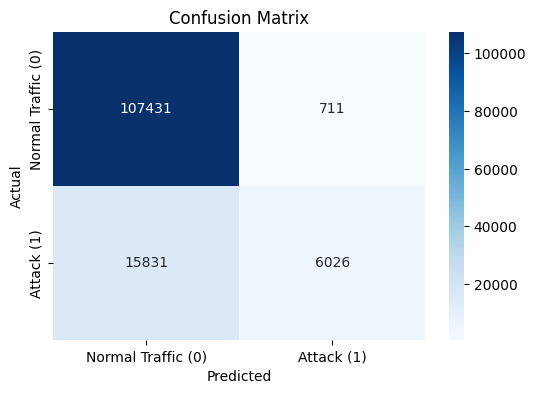

                precision    recall  f1-score   support

Normal Traffic       0.87      0.99      0.93    108142
        Attack       0.89      0.28      0.42     21857

      accuracy                           0.87    129999
     macro avg       0.88      0.63      0.68    129999
  weighted avg       0.88      0.87      0.84    129999



In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix
cm = confusion_matrix(y_test_adv_final, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal Traffic (0)', 'Attack (1)'], yticklabels=['Normal Traffic (0)', 'Attack (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print detailed classification report
print(classification_report(y_test_adv_final, y_pred, target_names=['Normal Traffic', 'Attack']))


In [37]:
import numpy as np
import pandas as pd

# Predictions on the (scaled) originals and adversarials
p_orig_attack = final_model.predict(X_test_attack, verbose=0).ravel()
p_adv_attack  = final_model.predict(X_attack_adv,  verbose=0).ravel()

orig_pred = (p_orig_attack > 0.5).astype(int)
adv_pred  = (p_adv_attack  > 0.5).astype(int)

# Masks for transitions
mask_1_to_0 = (orig_pred == 1) & (adv_pred == 0)  # attack → normal
mask_0_to_1 = (orig_pred == 0) & (adv_pred == 1)  # normal → attack (on the same attack samples)

n_1_to_0 = int(mask_1_to_0.sum())
n_0_to_1 = int(mask_0_to_1.sum())

# Optional: unchanged counts
n_1_to_1 = int(((orig_pred == 1) & (adv_pred == 1)).sum())
n_0_to_0 = int(((orig_pred == 0) & (adv_pred == 0)).sum())

total = len(orig_pred)

print(f"Total attack samples: {total}")
print(f"Flipped 1→0 (attack→normal): {n_1_to_0} ({n_1_to_0/total:.2%})")
print(f"Flipped 0→1 (normal→attack): {n_0_to_1} ({n_0_to_1/total:.2%})")
print(f"Stayed 1→1: {n_1_to_1} ({n_1_to_1/total:.2%})")
print(f"Stayed 0→0: {n_0_to_0} ({n_0_to_0/total:.2%})")

# Optional: a tidy 2×2 table of transitions
transition = pd.crosstab(pd.Series(orig_pred, name="orig"),
                         pd.Series(adv_pred,  name="adv"))
print("\nTransition table (orig → adv):\n", transition)


Total attack samples: 21857
Flipped 1→0 (attack→normal): 14776 (67.60%)
Flipped 0→1 (normal→attack): 16 (0.07%)
Stayed 1→1: 6010 (27.50%)
Stayed 0→0: 1055 (4.83%)

Transition table (orig → adv):
 adv       0     1
orig             
0      1055    16
1     14776  6010


In [36]:
import numpy as np
import pandas as pd

column_names = selected_features

# --- Predict on scaled inputs (no inverse-transform for prediction) ---
p_orig_attack = final_model.predict(X_test_attack, verbose=0).ravel()
p_adv_attack  = final_model.predict(X_attack_adv,  verbose=0).ravel()

orig_pred = (p_orig_attack > 0.5).astype(int)
adv_pred  = (p_adv_attack  > 0.5).astype(int)

# --- Find flips: 1 -> 0 ---
idx_flip = np.where((orig_pred == 1) & (adv_pred == 0))[0]
print(f"Total attack samples: {len(X_test_attack)}")
print(f"Flipped (1→0): {len(idx_flip)}")

if idx_flip.size == 0:
    print("No examples flipped from attack (1) to normal (0).")
else:
    # show up to N examples
    N = 15
    idx_show = idx_flip[:N]

    # inverse-transform ONLY FOR DISPLAY
    scaler_display = scaler if 'scaler' in locals() else scaler_full
    X_orig_disp = scaler_display.inverse_transform(X_test_attack[idx_show])
    X_adv_disp  = scaler_display.inverse_transform(X_attack_adv[idx_show])

    # predictions (from the already-computed probs)
    y_pred_orig = orig_pred[idx_show]
    y_pred_adv  = adv_pred[idx_show]

    # build tables like before
    df_original = pd.DataFrame(X_orig_disp, columns=column_names)
    df_original["Prediction"] = y_pred_orig

    df_adversarial = pd.DataFrame(X_adv_disp, columns=column_names)
    df_adversarial["Prediction"] = y_pred_adv

    # display settings (same style as earlier)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.precision', 6)
    pd.set_option('display.width', 200)

    print("\n🟦 Original Attack Samples (that later flipped 1→0):\n")
    print(df_original)

    print("\n🟥 Corresponding Adversarial Samples:\n")
    print(df_adversarial)

# 🟩 Normal samples for comparison (first up to 10)
n_norm = min(10, len(X_test_normal))
X_norm_scaled = X_test_normal[:n_norm]  # already scaled
scaler_display = scaler if 'scaler' in locals() else scaler_full

# Inverse-transform for display only
X_norm_disp = scaler_display.inverse_transform(X_norm_scaled)

# Predictions on scaled inputs
y_pred_norm = (final_model.predict(X_norm_scaled, verbose=0).ravel() > 0.5).astype(int)

# Build table
df_normal = pd.DataFrame(X_norm_disp, columns=column_names)
df_normal["Prediction"] = y_pred_norm

print("\n🟩 Normal Samples (benign) for comparison:\n")
print(df_normal)


Total attack samples: 21857
Flipped (1→0): 14776

🟦 Original Attack Samples (that later flipped 1→0):

    wlan_radio.duration  radiotap.dbm_antsignal  wlan_radio.signal_dbm  wlan_radio.data_rate  Prediction
0                  50.0                  -171.0                  -57.0              130.0000           1
1                  59.0                  -173.0                  -57.0               72.2222           1
2                  63.0                  -198.0                  -62.0              104.0000           1
3                  59.0                  -177.0                  -59.0               72.2222           1
4                  52.0                  -172.0                  -57.0              117.0000           1
5                  50.0                  -170.0                  -58.0              130.0000           1
6                  50.0                  -172.0                  -57.0              130.0000           1
7                  49.0                  -176.0          

# ADVERSARIAL TRAINING

In [92]:
# ---- Build masks and eps in scaled space ----
feat_idx = {c: i for i, c in enumerate(selected_features)}

mask_vec = np.zeros(len(selected_features), dtype=np.float32)
for mod in ['wlan_radio.duration', 'wlan_radio.data_rate']:
    if mod in feat_idx:
        mask_vec[feat_idx[mod]] = 1.0  # only these are mutable

eps_vec = np.zeros(len(selected_features), dtype=np.float32)
if 'wlan_radio.duration' in feat_idx:
    eps_vec[feat_idx['wlan_radio.duration']] = 0.3  # tune
if 'wlan_radio.data_rate' in feat_idx:
    eps_vec[feat_idx['wlan_radio.data_rate']] = 0.3  # tune

mask_tf = tf.convert_to_tensor(mask_vec)[tf.newaxis, :]
eps_tf  = tf.convert_to_tensor(eps_vec)[tf.newaxis, :]

bce = tf.keras.losses.BinaryCrossentropy(from_logits=False)  # keep in sync with your model

@tf.function
def fgsm_batch(model, X, y, mask, eps):
    with tf.GradientTape() as tape:
        tape.watch(X)
        p = model(X, training=False)
        loss = bce(y, p)
    grad = tape.gradient(loss, X)
    signed = tf.sign(grad) * mask
    return X + eps * signed

# ---- Craft ADV from TRAIN, sanitize, then mix with clean via alpha ----
Xtr_scaled = Xtr_sel.astype(np.float32)
ytr_float  = y_trainval.astype(np.float32).reshape(-1, 1)

Xtr_adv_scaled = fgsm_batch(final_model,
                            tf.convert_to_tensor(Xtr_scaled),
                            tf.convert_to_tensor(ytr_float),
                            mask_tf, eps_tf).numpy()

# Sanitize to physical domain and back to scaled
Xtr_adv_scaled = enforce_realistic_values_and_rescale_wifi(
    Xtr_adv_scaled, Xtr_scaled, scaler_full, selected_features
)

# Mix ratio (alpha): number of adversarial samples added relative to clean
alpha = 1.0  # try 0.5, 1.0, 2.0
n = Xtr_scaled.shape[0]
k = min(n, int(alpha * n))
rng = np.random.RandomState(1)
idxs = rng.choice(n, size=k, replace=False)

X_mix = np.vstack([Xtr_scaled, Xtr_adv_scaled[idxs]])
y_mix = np.vstack([ytr_float, ytr_float[idxs]])

# ---- Retrain (or fine-tune) on mixed data ----
final_model = build_model(input_dim=Xtr_sel.shape[1])  # same arch
final_model.fit(
    X_mix, y_mix,
    epochs=best_params['epochs'],
    batch_size=best_params['batch_size'],
    validation_split=0.1,
    verbose=1
)

Epoch 1/6
29250/29250 ━━━━━━━━━━━━━━━━━━━━ 54s 2ms/step - accuracy: 0.9355 - loss: 0.1559 - val_accuracy: 0.9789 - val_loss: 0.0674
Epoch 2/6
29250/29250 ━━━━━━━━━━━━━━━━━━━━ 51s 2ms/step - accuracy: 0.9738 - loss: 0.0722 - val_accuracy: 0.9793 - val_loss: 0.0503
Epoch 3/6
29250/29250 ━━━━━━━━━━━━━━━━━━━━ 53s 2ms/step - accuracy: 0.9777 - loss: 0.0609 - val_accuracy: 0.9857 - val_loss: 0.0450
Epoch 4/6
29250/29250 ━━━━━━━━━━━━━━━━━━━━ 56s 2ms/step - accuracy: 0.9797 - loss: 0.0554 - val_accuracy: 0.9869 - val_loss: 0.0428
Epoch 5/6
29250/29250 ━━━━━━━━━━━━━━━━━━━━ 54s 2ms/step - accuracy: 0.9809 - loss: 0.0517 - val_accuracy: 0.9887 - val_loss: 0.0356
Epoch 6/6
29250/29250 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - accuracy: 0.9820 - loss: 0.0495 - val_accuracy: 0.9858 - val_loss: 0.0348


In [93]:
# ---- Evaluate: clean test AND adversarial test (crafted from test) ----
# Clean
test_probs = final_model.predict(Xte_sel, verbose=0).ravel()
test_preds = (test_probs > 0.5).astype(int)
print("Clean Test Report:")
print(classification_report(y_test, test_preds, zero_division=0))

Clean Test Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    108142
           1       0.95      0.93      0.94     21857

    accuracy                           0.98    129999
   macro avg       0.97      0.96      0.96    129999
weighted avg       0.98      0.98      0.98    129999



In [116]:
# Mix ratio (alpha): number of adversarial samples added relative to clean
alpha = 1.0  # try 0.5, 1.0, 2.0
n = Xtr_scaled.shape[0]
k = min(n, int(alpha * n))
rng = np.random.RandomState(1)
idxs = rng.choice(n, size=k, replace=False)

X_mix = np.vstack([Xtr_scaled, Xtr_adv_scaled[idxs]])
y_mix = np.vstack([ytr_float, ytr_float[idxs]])

# ---- Retrain (or fine-tune) on mixed data ----
final_model = build_model(input_dim=Xtr_sel.shape[1])  # same arch
final_model.fit(
    X_mix, y_mix,
    epochs=best_params['epochs'],
    batch_size=best_params['batch_size'],
    validation_split=0.1,
    verbose=1
)

Epoch 1/6
29250/29250 ━━━━━━━━━━━━━━━━━━━━ 53s 2ms/step - accuracy: 0.9410 - loss: 0.1397 - val_accuracy: 0.9816 - val_loss: 0.0565
Epoch 2/6
29250/29250 ━━━━━━━━━━━━━━━━━━━━ 51s 2ms/step - accuracy: 0.9794 - loss: 0.0609 - val_accuracy: 0.9859 - val_loss: 0.0453
Epoch 3/6
29250/29250 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - accuracy: 0.9825 - loss: 0.0507 - val_accuracy: 0.9836 - val_loss: 0.0485
Epoch 4/6
29250/29250 ━━━━━━━━━━━━━━━━━━━━ 53s 2ms/step - accuracy: 0.9839 - loss: 0.0463 - val_accuracy: 0.9919 - val_loss: 0.0247
Epoch 5/6
29250/29250 ━━━━━━━━━━━━━━━━━━━━ 51s 2ms/step - accuracy: 0.9853 - loss: 0.0422 - val_accuracy: 0.9939 - val_loss: 0.0224
Epoch 6/6
29250/29250 ━━━━━━━━━━━━━━━━━━━━ 50s 2ms/step - accuracy: 0.9855 - loss: 0.0410 - val_accuracy: 0.9935 - val_loss: 0.0208


In [117]:
# 4. Combine all three together (normal + original attack + adversarial attack)
X_all = np.vstack((X_test_normal, X_test_attack, X_attack_adv))
y_all = np.hstack((y_test_normal, y_test_attack, y_test_attack))  # use same labels for adv

# Shuffle
X_all, y_all = shuffle(X_all, y_all, random_state=1)

y_pred_all = (final_model.predict(X_all) > 0.5).astype(int)
acc_all = accuracy_score(y_all, y_pred_all)
prec_all = precision_score(y_all, y_pred_all, average='weighted')
rec_all = recall_score(y_all, y_pred_all, average='weighted')

print("\n=== Combined Evaluation (Normal + Attack + Adversarial) ===")
print(f"Accuracy: {acc_all * 100:.2f}%")
print(f"Precision: {prec_all * 100:.2f}%")
print(f"Recall: {rec_all * 100:.2f}%")

4746/4746 ━━━━━━━━━━━━━━━━━━━━ 4s 875us/step

=== Combined Evaluation (Normal + Attack + Adversarial) ===
Accuracy: 95.33%
Precision: 95.38%
Recall: 95.33%


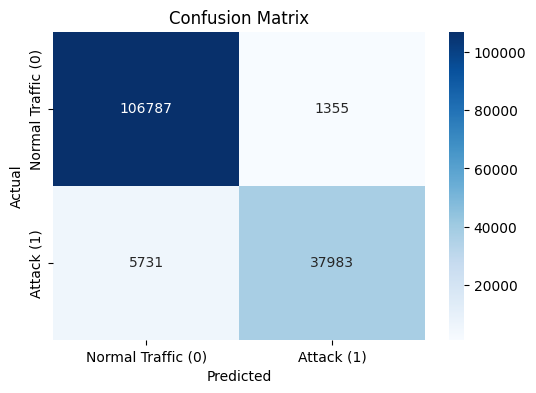

                precision    recall  f1-score   support

Normal Traffic       0.95      0.99      0.97    108142
        Attack       0.97      0.87      0.91     43714

      accuracy                           0.95    151856
     macro avg       0.96      0.93      0.94    151856
  weighted avg       0.95      0.95      0.95    151856



In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix
cm = confusion_matrix(y_all, y_pred_all)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal Traffic (0)', 'Attack (1)'], yticklabels=['Normal Traffic (0)', 'Attack (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print detailed classification report
print(classification_report(y_all, y_pred_all, target_names=['Normal Traffic', 'Attack']))


# 0.5

In [112]:
# 4. Combine all three together (normal + original attack + adversarial attack)
X_all = np.vstack((X_test_normal, X_test_attack, X_attack_adv))
y_all = np.hstack((y_test_normal, y_test_attack, y_test_attack))  # use same labels for adv

# Shuffle
X_all, y_all = shuffle(X_all, y_all, random_state=1)

y_pred_all = (final_model.predict(X_all) > 0.5).astype(int)
acc_all = accuracy_score(y_all, y_pred_all)
prec_all = precision_score(y_all, y_pred_all, average='weighted')
rec_all = recall_score(y_all, y_pred_all, average='weighted')

print("\n=== Combined Evaluation (Normal + Attack + Adversarial) ===")
print(f"Accuracy: {acc_all * 100:.2f}%")
print(f"Precision: {prec_all * 100:.2f}%")
print(f"Recall: {rec_all * 100:.2f}%")

4746/4746 ━━━━━━━━━━━━━━━━━━━━ 4s 897us/step

=== Combined Evaluation (Normal + Attack + Adversarial) ===
Accuracy: 95.17%
Precision: 95.27%
Recall: 95.17%


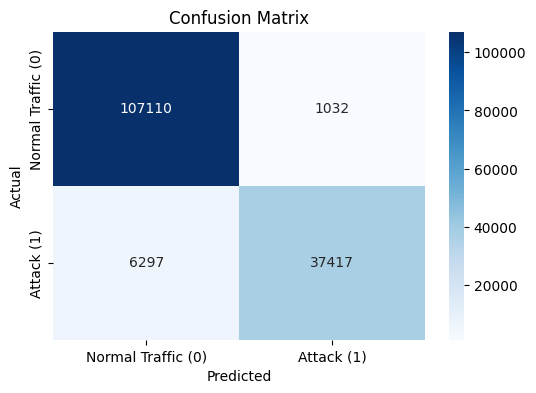

                precision    recall  f1-score   support

Normal Traffic       0.94      0.99      0.97    108142
        Attack       0.97      0.86      0.91     43714

      accuracy                           0.95    151856
     macro avg       0.96      0.92      0.94    151856
  weighted avg       0.95      0.95      0.95    151856



In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix
cm = confusion_matrix(y_all, y_pred_all)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal Traffic (0)', 'Attack (1)'], yticklabels=['Normal Traffic (0)', 'Attack (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print detailed classification report
print(classification_report(y_all, y_pred_all, target_names=['Normal Traffic', 'Attack']))


# ZOO

https://github.com/huanzhang12/ZOO-Attack

In [119]:
from tensorflow.keras.models import load_model
final_model = load_model(r"C:\Users\ulami\Desktop\magisterka\models_final\AWID_csv_final2.keras")   

In [42]:
import numpy as np
from sklearn.metrics import accuracy_score

# ---------- Utilities ----------
def predict_proba(model, X):
    """Return P(y=1) as a flat numpy array."""
    return model.predict(X, verbose=0).ravel()

def bce_loss(p, y):
    """Binary cross-entropy (elementwise) with clipping for numerical stability."""
    eps = 1e-7
    p = np.clip(p, eps, 1 - eps)
    return -(y * np.log(p) + (1 - y) * np.log(1 - p))

def loss_at_x(model, x, y_scalar):
    """Loss at a single point x (1D) for label y in {0,1}."""
    p = predict_proba(model, x[None, :])[0]
    return bce_loss(p, y_scalar)

def finite_diff_grad(model, x, y_scalar, h=1e-3):
    """
    Central-difference gradient of loss wrt x.
    Uses 2*d queries per call (d = number of features).
    """
    d = x.shape[0]
    batch_plus = np.repeat(x[None, :], d, axis=0)
    batch_minus = batch_plus.copy()
    for i in range(d):
        batch_plus[i, i] += h
        batch_minus[i, i] -= h

    p_plus = predict_proba(model, batch_plus)
    p_minus = predict_proba(model, batch_minus)
    L_plus = bce_loss(p_plus, np.full(d, y_scalar))
    L_minus = bce_loss(p_minus, np.full(d, y_scalar))

    # central difference derivative dL/dx_i ≈ (L(x+h e_i) - L(x-h e_i)) / (2h)
    grad = (L_plus - L_minus) / (2.0 * h)
    queries = 2 * d
    return grad, queries

def project_linf(x0, x, eps):
    """Project x to the Linf ball around x0 with radius eps."""
    return np.clip(x, x0 - eps, x0 + eps)

def project_l2(x0, x, eps):
    """Project x to the L2 ball around x0 with radius eps."""
    delta = x - x0
    norm = np.linalg.norm(delta, ord=2)
    if norm > eps:
        delta = delta * (eps / (norm + 1e-12))
    return x0 + delta

# ---------- Core ZOO attacker (single example) ----------
def zoo_attack_single(
    model,
    x0,
    y_true,
    steps=300,
    lr=0.05,
    h=1e-3,
    eps=0.5,
    norm="linf",          # "linf" or "l2"
    targeted=None,        # None for untargeted; otherwise target label in {0,1}
    clip_min=None,
    clip_max=None,
    early_stop=True
):
    """
    Runs ZOO on one sample.
    - Untargeted: ascend BCE loss for the true label until misclassification.
    - Targeted:   descend BCE loss for the chosen target label until classified as target.

    Returns: x_adv, success(bool), queries(int), iters(int)
    """
    x = x0.copy()
    queries = 0
    d = x.size

    # Choose projector
    projector = project_linf if norm == "linf" else project_l2

    # Initial check
    p0 = predict_proba(model, x[None, :])[0]; queries += 1
    y_pred0 = int(p0 > 0.5)
    already_wrong = (y_pred0 != y_true)
    if targeted is None and already_wrong:
        return x, True, queries, 0  # already misclassified

    for t in range(1, steps + 1):
        # For targeted, define loss towards the target; for untargeted, towards the true label
        label_for_loss = targeted if targeted is not None else y_true

        # Zeroth-order gradient estimate of d(loss)/dx
        grad, q = finite_diff_grad(model, x, label_for_loss, h=h)
        queries += q

        # Update rule: untargeted -> ascend; targeted -> descend
        direction = +1.0 if targeted is None else -1.0
        x = x + direction * lr * grad

        # Project to epsilon-ball around original point
        x = projector(x0, x, eps)

        # Optional: keep within observed data range to avoid extreme z-scores
        if (clip_min is not None) and (clip_max is not None):
            x = np.minimum(np.maximum(x, clip_min), clip_max)

        # Check success condition
        p = predict_proba(model, x[None, :])[0]; queries += 1
        y_pred = int(p > 0.5)
        success = (y_pred != y_true) if targeted is None else (y_pred == targeted)

        if early_stop and success:
            return x, True, queries, t

    # End of budget
    p = predict_proba(model, x[None, :])[0]; queries += 1
    y_pred = int(p > 0.5)
    success = (y_pred != y_true) if targeted is None else (y_pred == targeted)
    return x, success, queries, steps

# ---------- Convenience: attack a batch and summarize ----------
def run_zoo_attack(
    model,
    X,
    y,
    X_train_for_bounds=None,     # e.g., Xtr_sel to bound to observed range
    max_samples=100,
    eps=0.5,
    norm="linf",
    steps=300,
    lr=0.05,
    h=1e-3,
    targeted=None,
    only_on_correct=True,
    random_state=0
):
    rng = np.random.default_rng(random_state)

    # Bounds from training data (optional but recommended for tabular)
    if X_train_for_bounds is not None:
        clip_min = X_train_for_bounds.min(axis=0)
        clip_max = X_train_for_bounds.max(axis=0)
    else:
        clip_min = clip_max = None

    # Decide which indices to attack
    y_pred_all = (predict_proba(model, X) > 0.5).astype(int)
    if only_on_correct:
        candidates = np.where(y_pred_all == y)[0]
    else:
        candidates = np.arange(len(y))
    rng.shuffle(candidates)
    idxs = candidates[:max_samples]

    successes = []
    queries_list = []
    iters_list = []
    X_adv = np.copy(X)

    for idx in idxs:
        x0 = X[idx]
        y_true = int(y[idx])
        x_adv, success, q, iters = zoo_attack_single(
            model=model,
            x0=x0,
            y_true=y_true,
            steps=steps,
            lr=lr,
            h=h,
            eps=eps,
            norm=norm,
            targeted=targeted,
            clip_min=clip_min,
            clip_max=clip_max,
            early_stop=True
        )
        X_adv[idx] = x_adv
        successes.append(success)
        queries_list.append(q)
        iters_list.append(iters)

    # Metrics
    success_rate = np.mean(successes) if len(successes) else 0.0
    avg_queries = np.mean(queries_list) if queries_list else 0
    avg_iters = np.mean(iters_list) if iters_list else 0

    # Evaluate accuracy before/after (on attacked subset)
    acc_before = accuracy_score(y[idxs], y_pred_all[idxs])
    acc_after = accuracy_score(y[idxs], (predict_proba(model, X_adv[idxs]) > 0.5).astype(int))

    summary = {
        "num_attacked": len(idxs),
        "only_on_correct": only_on_correct,
        "targeted": targeted,
        "eps": eps,
        "norm": norm,
        "steps": steps,
        "lr": lr,
        "h": h,
        "success_rate": float(success_rate),
        "avg_queries": float(avg_queries),
        "avg_iters": float(avg_iters),
        "acc_before_on_subset": float(acc_before),
        "acc_after_on_subset": float(acc_after),
        "attacked_indices": idxs,
        "successes_bool": np.array(successes, dtype=bool),
        "queries_each": np.array(queries_list, dtype=int),
        "iters_each": np.array(iters_list, dtype=int),
        "X_adv": X_adv,  # full array with adversarial versions at attacked indices
    }
    return summary

In [122]:
attack_mask = (y_test.astype(int) == 1)
X_attack = Xte_sel[attack_mask]
y_attack = y_test[attack_mask].astype(int)

print(f"Attack samples in test set: {len(y_attack)}")

# Baseline detection on those attack samples
pred_attack_before = (final_model.predict(X_attack, verbose=0).ravel() > 0.5).astype(int)
tpr_before = (pred_attack_before == 1).mean()  # detection rate among attack samples
print(f"Baseline detection rate on attack samples (TPR): {tpr_before:.3f}")

# --- 2) Run TARGETED ZOO to force label 0 (normal) on attack samples only ---
zoo_attack_on_attacks = run_zoo_attack(
    model=final_model,
    X=X_attack,
    y=y_attack,
    X_train_for_bounds=None,
    targeted=0,
    only_on_correct=True,
    max_samples=min(21857, len(y_attack)),
    eps=0.3,
    norm="linf",
    steps=500,
    lr=0.1,
    h=1e-3,
    random_state=1
)

print("==== ZOO on attack samples (targeted to NORMAL / 0) ====")
for k, v in zoo_attack_on_attacks.items():
    if k in {"X_adv", "attacked_indices", "successes_bool", "queries_each", "iters_each"}:
        continue
    print(f"{k}: {v}")

# --- 3) Evaluate evasion on attacked subset and overall attack set ---
X_attack_adv = zoo_attack_on_attacks["X_adv"]
attacked_local_idx = zoo_attack_on_attacks["attacked_indices"]
success_flags = zoo_attack_on_attacks["successes_bool"]
queries_each = zoo_attack_on_attacks["queries_each"]

# Predictions AFTER on attack-only array (includes both attacked & untouched elements)
pred_attack_after = (final_model.predict(X_attack_adv, verbose=0).ravel() > 0.5).astype(int)
tpr_after = (pred_attack_after == 1).mean()
evasion_rate_all_attacks = (pred_attack_after == 0).mean()

# Evasion rate restricted to actually ATTACKED samples
evasion_rate_attacked = success_flags.mean() if len(success_flags) else 0.0
avg_queries_attacked = queries_each.mean() if len(queries_each) else 0.0

print(f"\n--- Evasion results ---")
print(f"Detection rate on attack samples BEFORE: {tpr_before:.3f}")
print(f"Detection rate on attack samples AFTER:  {tpr_after:.3f}")
print(f"Evasion rate among ALL attack samples:   {evasion_rate_all_attacks:.3f}")
print(f"Evasion rate among ATTACKED subset:      {evasion_rate_attacked:.3f}")
print(f"Avg queries per attacked sample:         {avg_queries_attacked:.1f}")

# --- 4) (Optional) Put adversarial attacks back into the FULL test matrix ---
# This is handy if you want to re-run a full classification report after evasion.
Xte_adv_full = Xte_sel.copy()
global_attack_indices = np.where(attack_mask)[0]
Xte_adv_full[global_attack_indices] = X_attack_adv

# Example: full post-attack report
test_preds_after = (final_model.predict(Xte_adv_full, verbose=0).ravel() > 0.5).astype(int)

from sklearn.metrics import classification_report
print("\nFinal Test Set Report AFTER targeted ZOO on attack samples:")
print(classification_report(y_test, test_preds_after, zero_division=0))


Attack samples in test set: 21857
Baseline detection rate on attack samples (TPR): 0.951
==== ZOO on attack samples (targeted to NORMAL / 0) ====
num_attacked: 20786
only_on_correct: True
targeted: 0
eps: 0.3
norm: linf
steps: 500
lr: 0.1
h: 0.001
success_rate: 0.9793129991340325
avg_queries: 105.83046281150774
avg_iters: 11.645530645626865
acc_before_on_subset: 1.0
acc_after_on_subset: 0.02068700086596748

--- Evasion results ---
Detection rate on attack samples BEFORE: 0.951
Detection rate on attack samples AFTER:  0.020
Evasion rate among ALL attack samples:   0.980
Evasion rate among ATTACKED subset:      0.979
Avg queries per attacked sample:         105.8

Final Test Set Report AFTER targeted ZOO on attack samples:
              precision    recall  f1-score   support

           0       0.83      0.99      0.91    108142
           1       0.38      0.02      0.04     21857

    accuracy                           0.83    129999
   macro avg       0.61      0.51      0.47    1299

In [124]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Get predictions
# y_pred = final_model.predict(X_test_adv_final)
y_pred = test_preds_after

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print results
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Precision: {precision * 100:.2f}%")
print(f"Test Recall: {recall * 100:.2f}%")

Test Accuracy: 82.97%
Test Precision: 75.69%
Test Recall: 82.97%


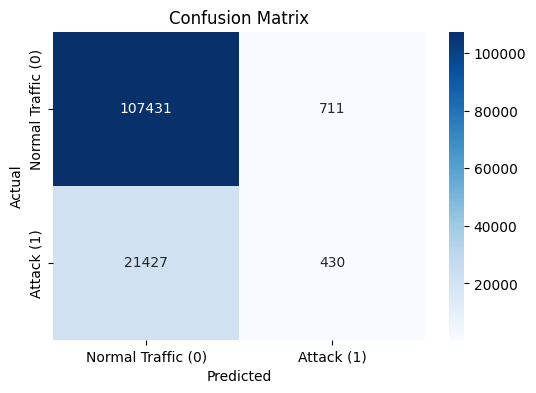

                precision    recall  f1-score   support

Normal Traffic       0.83      0.99      0.91    108142
        Attack       0.38      0.02      0.04     21857

      accuracy                           0.83    129999
     macro avg       0.61      0.51      0.47    129999
  weighted avg       0.76      0.83      0.76    129999



In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal Traffic (0)', 'Attack (1)'], yticklabels=['Normal Traffic (0)', 'Attack (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print detailed classification report
print(classification_report(y_test, y_pred, target_names=['Normal Traffic', 'Attack']))


In [128]:
import numpy as np
import pandas as pd

# --- 1) Collect only the successfully flipped samples (1 → 0) ---
success_mask = zoo_attack_on_attacks["successes_bool"]
attacked_idx = zoo_attack_on_attacks["attacked_indices"]
successful_local_idx = np.array(attacked_idx)[success_mask]

# Standardized (model-space) originals + adversarials for those successes
X_orig_success_std = X_attack[successful_local_idx]
X_adv_success_std  = zoo_attack_on_attacks["X_adv"][successful_local_idx]

# Sanity: keep only those that truly flipped 1->0 according to the model
pred_orig = (final_model.predict(X_orig_success_std, verbose=0).ravel() > 0.5).astype(int)
pred_adv  = (final_model.predict(X_adv_success_std,  verbose=0).ravel() > 0.5).astype(int)

flip_mask = (pred_orig == 1) & (pred_adv == 0)
X_orig_success_std = X_orig_success_std[flip_mask]
X_adv_success_std  = X_adv_success_std[flip_mask]
pred_orig = pred_orig[flip_mask]
pred_adv  = pred_adv[flip_mask]

# --- 2) Inverse-transform back to original feature units ---
# scaler_full was fit on the selected columns used by the model (Xtr_sel)
X_orig_success = scaler_full.inverse_transform(X_orig_success_std)
X_adv_success  = scaler_full.inverse_transform(X_adv_success_std)

# --- 3) Build DataFrames with your desired columns and formatting ---
cols = ["wlan_radio.duration", "radiotap.dbm_antsignal", "wlan_radio.signal_dbm", "wlan_radio.data_rate"]

def make_df(X, preds):
    df = pd.DataFrame(X, columns=cols)
    return df

df_orig = make_df(X_orig_success, pred_orig)
df_adv  = make_df(X_adv_success,  pred_adv)

# --- 4) Show up to 10 examples in your exact format ---
n_show = min(10, len(df_orig))

print("Original Attack Samples (that later flipped 1→0):\n")
print(df_orig.head(n_show).to_string(index=True))

print("\nAdversarial Counterparts:\n")
print(df_adv.head(n_show).to_string(index=True))


Original Attack Samples (that later flipped 1→0):

   wlan_radio.duration  radiotap.dbm_antsignal  wlan_radio.signal_dbm  wlan_radio.data_rate
0                 64.0                  -149.0                  -59.0                 6.000
1                135.0                  -105.0                  -34.0               130.000
2                 48.0                  -175.0                  -59.0               173.333
3                384.0                  -209.0                  -69.0                 1.000
4                408.0                  -176.0                  -60.0                 6.500
5                 50.0                  -170.0                  -58.0               130.000
6                 64.0                  -153.0                  -59.0                 6.000
7                 45.0                  -163.0                  -54.0               144.444
8                 64.0                  -149.0                  -57.0                 6.000
9                119.0       

# ZOO - REALISTC VALUES

In [45]:
import numpy as np
from sklearn.metrics import accuracy_score

# ---------- Constrained finite-diff (central) ----------
def finite_diff_grad_constrained(
    model,
    x,
    y_scalar,
    h,
    projector,
    x0,
    eps,
    enforcer_batch,
    clip_min=None,
    clip_max=None,
):
    """
    Central-difference gradient of loss wrt x, but every probe is projected and
    run through the feasibility enforcer before the model sees it.
    """
    d = x.shape[0]
    batch_plus = np.repeat(x[None, :], d, axis=0)
    batch_minus = batch_plus.copy()
    for i in range(d):
        batch_plus[i, i] += h
        batch_minus[i, i] -= h

    # Project probes to epsilon-ball and apply optional [clip_min, clip_max]
    batch_plus = projector(x0, batch_plus, eps)
    batch_minus = projector(x0, batch_minus, eps)
    if (clip_min is not None) and (clip_max is not None):
        batch_plus = np.minimum(np.maximum(batch_plus, clip_min), clip_max)
        batch_minus = np.minimum(np.maximum(batch_minus, clip_min), clip_max)

    # Enforce real-world constraints on the *batch* of probes
    batch_plus = enforcer_batch(batch_plus)
    batch_minus = enforcer_batch(batch_minus)

    p_plus = predict_proba(model, batch_plus)
    p_minus = predict_proba(model, batch_minus)

    L_plus = bce_loss(p_plus, np.full(d, y_scalar))
    L_minus = bce_loss(p_minus, np.full(d, y_scalar))

    grad = (L_plus - L_minus) / (2.0 * h)
    queries = 2 * d
    return grad, queries


# ---------- Single-example constrained ZOO ----------
def zoo_attack_single_constrained(
    model,
    x0_scaled,
    y_true,
    *,
    steps=300,
    lr=0.05,
    h=1e-3,
    eps=0.5,
    norm="linf", 
    targeted=None,  
    clip_min=None,
    clip_max=None,
    early_stop=True,
    # --- NEW: feasibility enforcer wiring ---
    scaler=None,
    feature_order=None,
    X_orig_scaled_ref=None, 
    enforcer_func=enforce_realistic_values_and_rescale_wifi,
):
    """
    Constrained ZOO:
      - Every step and probe stays inside the epsilon ball AND inside the
        real-world feasible set (via enforcer_func).
    Returns: x_adv_scaled, success(bool), queries(int), iters(int)
    """
    assert scaler is not None and feature_order is not None and X_orig_scaled_ref is not None, \
        "Provide scaler, feature_order, and X_orig_scaled_ref for constraint enforcement."

    # Build a *batch* enforcer that always uses the same original sample row
    # for non-attackable features (radiotap.*, etc.)
    def enforcer_batch(X_scaled_batch):
        # X_orig_scaled is repeated to match the batch shape
        X_orig_scaled = np.repeat(X_orig_scaled_ref[None, :], X_scaled_batch.shape[0], axis=0)
        return enforcer_func(X_scaled_batch, X_orig_scaled, scaler, feature_order)

    x = x0_scaled.copy()
    queries = 0

    projector = project_linf if norm == "linf" else project_l2

    # Initial feasibility snap (optional but keeps x exactly feasible before starting)
    x = enforcer_batch(x[None, :])[0]

    # Initial check
    p0 = predict_proba(model, x[None, :])[0]; queries += 1
    y_pred0 = int(p0 > 0.5)
    already_wrong = (y_pred0 != y_true)
    if targeted is None and already_wrong:
        return x, True, queries, 0

    for t in range(1, steps + 1):
        label_for_loss = targeted if targeted is not None else y_true

        # Constrained finite-diff gradient
        grad, q = finite_diff_grad_constrained(
            model=model,
            x=x,
            y_scalar=label_for_loss,
            h=h,
            projector=projector,
            x0=x0_scaled,
            eps=eps,
            enforcer_batch=enforcer_batch,
            clip_min=clip_min,
            clip_max=clip_max,
        )
        queries += q

        # Update (ascend for untargeted, descend for targeted)
        direction = +1.0 if targeted is None else -1.0
        x = x + direction * lr * grad

        # Project to ε-ball
        x = projector(x0_scaled, x, eps)

        # Optional clip to observed range (still in scaled space)
        if (clip_min is not None) and (clip_max is not None):
            x = np.minimum(np.maximum(x, clip_min), clip_max)

        # Enforce physical/measurement constraints + rescale
        x = enforcer_batch(x[None, :])[0]

        # Success check
        p = predict_proba(model, x[None, :])[0]; queries += 1
        y_pred = int(p > 0.5)
        success = (y_pred != y_true) if targeted is None else (y_pred == targeted)
        if early_stop and success:
            return x, True, queries, t

    # Final check
    p = predict_proba(model, x[None, :])[0]; queries += 1
    y_pred = int(p > 0.5)
    success = (y_pred != y_true) if targeted is None else (y_pred == targeted)
    return x, success, queries, steps


# ---------- Batch convenience with constraints ----------
from tqdm import tqdm

def run_zoo_attack_constrained(
    model,
    X_scaled,
    y,
    *,
    scaler,
    feature_order,
    X_orig_scaled=None,
    X_train_for_bounds=None,
    max_samples=100,
    eps=0.5,
    norm="linf",
    steps=300,
    lr=0.05,
    h=1e-3,
    targeted=None,
    only_on_correct=True,
    random_state=0
):
    rng = np.random.default_rng(random_state)

    if X_train_for_bounds is not None:
        clip_min = X_train_for_bounds.min(axis=0)
        clip_max = X_train_for_bounds.max(axis=0)
    else:
        clip_min = clip_max = None

    if X_orig_scaled is None:
        X_orig_scaled = X_scaled

    y_pred_all = (predict_proba(model, X_scaled) > 0.5).astype(int)
    if only_on_correct:
        candidates = np.where(y_pred_all == y)[0]
    else:
        candidates = np.arange(len(y))
    rng.shuffle(candidates)
    idxs = candidates[:max_samples]

    successes = []
    queries_list = []
    iters_list = []
    X_adv_scaled = np.copy(X_scaled)

    # ---- PROGRESS BAR HERE ----
    for idx in tqdm(idxs, desc="Constrained ZOO attack", unit="sample"):
        x0 = X_scaled[idx]
        y_true = int(y[idx])

        x_orig_ref = X_orig_scaled[idx]

        x_adv, success, q, iters = zoo_attack_single_constrained(
            model=model,
            x0_scaled=x0,
            y_true=y_true,
            steps=steps,
            lr=lr,
            h=h,
            eps=eps,
            norm=norm,
            targeted=targeted,
            clip_min=clip_min,
            clip_max=clip_max,
            early_stop=True,
            scaler=scaler,
            feature_order=feature_order,
            X_orig_scaled_ref=x_orig_ref,
        )
        X_adv_scaled[idx] = x_adv
        successes.append(success)
        queries_list.append(q)
        iters_list.append(iters)

    # metrics & summary unchanged...
    success_rate = float(np.mean(successes)) if len(successes) else 0.0
    avg_queries = float(np.mean(queries_list)) if queries_list else 0.0
    avg_iters = float(np.mean(iters_list)) if iters_list else 0.0

    acc_before = accuracy_score(y[idxs], y_pred_all[idxs])
    acc_after = accuracy_score(
        y[idxs],
        (predict_proba(model, X_adv_scaled[idxs]) > 0.5).astype(int),
    )

    summary = {
        "num_attacked": len(idxs),
        "only_on_correct": only_on_correct,
        "targeted": targeted,
        "eps": eps,
        "norm": norm,
        "steps": steps,
        "lr": lr,
        "h": h,
        "success_rate": success_rate,
        "avg_queries": avg_queries,
        "avg_iters": avg_iters,
        "acc_before_on_subset": float(acc_before),
        "acc_after_on_subset": float(acc_after),
        "attacked_indices": idxs,
        "successes_bool": np.array(successes, dtype=bool),
        "queries_each": np.array(queries_list, dtype=int),
        "iters_each": np.array(iters_list, dtype=int),
        "X_adv": X_adv_scaled.astype(np.float32),
    }
    return summary



In [25]:
from tensorflow.keras.models import load_model
final_model = load_model(r"C:\Users\ulami\Desktop\magisterka\models_final\AWID_csv_final2.keras")   

In [32]:
print("Xte_sel shape:", getattr(Xte_sel, "shape", None))
print("Model expects:", final_model.input_shape)


Xte_sel shape: (129999, 4)
Model expects: (None, 4)


In [34]:
X_attack.shape

(21857, 4)

In [46]:
# --- 1) Slice out ATTACK samples (y == 1) from your standardized test set ---
attack_mask = (y_test.astype(int) == 1)
X_attack = Xte_sel[attack_mask]
y_attack = y_test[attack_mask].astype(int)

print(f"Attack samples in test set: {len(y_attack)}")

# Baseline detection on those attack samples
pred_attack_before = (final_model.predict(X_attack, verbose=0).ravel() > 0.5).astype(int)
tpr_before = (pred_attack_before == 1).mean()  # detection rate among attack samples
print(f"Baseline detection rate on attack samples (TPR): {tpr_before:.3f}")

Attack samples in test set: 21857
Baseline detection rate on attack samples (TPR): 0.951


In [40]:
# Feature order & scaler used in training
feature_order = selected_features
scaler_project = scaler if 'scaler' in locals() else scaler_full
feat_idx = {c: i for i, c in enumerate(feature_order)}

In [47]:
# --- 2) Run TARGETED, CONSTRAINED ZOO to force label 0 on attack samples only ---
zoo_attack_on_attacks = run_zoo_attack_constrained(
    model=final_model,
    X_scaled=X_attack,                  # standardized test subset (attacks)
    y=y_attack,
    scaler=scaler_project,                      # same scaler used to create X_attack
    feature_order=feature_order,        # list/tuple of column names in scaler order
    X_orig_scaled=X_attack,             # per-sample "original" in scaled space
    targeted=0,
    only_on_correct=True,
    max_samples=min(500, len(y_attack)),
    eps=0.3,                            # epsilon in standardized units
    norm="linf",
    steps=300,
    lr=0.1,
    h=1e-3,
    random_state=1
)


Constrained ZOO attack: 100%|██████████| 500/500 [7:44:44<00:00, 55.77s/sample]  


In [55]:
# --- 3) Evaluate ONLY on the actually ATTACKED subset (e.g. the 500 samples you attacked) ---
X_attack_adv = zoo_attack_on_attacks["X_adv"]  # full-length X_attack array where only attacked rows were changed
attacked_local_idx = np.array(zoo_attack_on_attacks["attacked_indices"], dtype=int)  # local indices inside X_attack that were attacked
success_flags = np.array(zoo_attack_on_attacks["successes_bool"], dtype=bool)
queries_each = np.array(zoo_attack_on_attacks["queries_each"], dtype=int)

# Defensive: if nothing was attacked, skip gracefully
if len(attacked_local_idx) == 0:
    print("No attacked samples were produced (attacked_indices is empty). Nothing to evaluate.")
else:
    # Subset BEFORE (original X_attack rows for the attacked subset)
    X_attacked_before = X_attack[attacked_local_idx]
    pred_before = (final_model.predict(X_attacked_before, verbose=0).ravel() > 0.5).astype(int)
    detection_rate_before = (pred_before == 1).mean()

    # Subset AFTER (adversarial rows in X_attack_adv corresponding to attacked_local_idx)
    X_attacked_after = X_attack_adv[attacked_local_idx]
    pred_after = (final_model.predict(X_attacked_after, verbose=0).ravel() > 0.5).astype(int)
    detection_rate_after = (pred_after == 1).mean()

    # Evasion: fraction predicted as 0 after attack on the attacked subset
    evasion_rate_subset = (pred_after == 0).mean()

    # Consistency checks / summary stats
    avg_queries_attacked = queries_each.mean() if queries_each.size else 0.0
    reported_success_rate = success_flags.mean() if success_flags.size else 0.0

    print(f"\n--- Evasion results (ONLY on ATTACKED SUBSET: {len(attacked_local_idx)} samples) ---")
    print(f"Detection rate BEFORE (attacked subset): {detection_rate_before:.3f}")
    print(f"Detection rate AFTER  (attacked subset): {detection_rate_after:.3f}")
    print(f"Evasion rate (attacked subset, pred==0 AFTER): {evasion_rate_subset:.3f}")
    print(f"Reported attack success rate (success_flags mean): {reported_success_rate:.3f}")
    print(f"Avg queries per attacked sample: {avg_queries_attacked:.1f}")

# --- 4) (optional) Put those adversarial attacks back into the FULL test matrix ---
# If you still want to inject only the attacked rows into the full test set for a full-report, map local->global:
global_attack_indices = np.where(attack_mask)[0]            # all global indices that were selected as "attack" set
# Map only if attacked_local_idx not empty
if len(attacked_local_idx):
    attacked_global_indices = global_attack_indices[attacked_local_idx]  # map local attacked indices -> global indices

    Xte_adv_full = Xte_sel.copy()
    # Replace only the attacked global rows with their adversarial versions
    Xte_adv_full[attacked_global_indices] = X_attack_adv[attacked_local_idx]

    # Evaluate on the full test set after injecting only the attacked adversarials
    test_preds_after = (final_model.predict(Xte_adv_full, verbose=0).ravel() > 0.5).astype(int)

    from sklearn.metrics import classification_report
    print("\nFinal Test Set Report AFTER injecting ONLY the attacked adversarials into the full test set:")
    print(classification_report(y_test, test_preds_after, zero_division=0))
else:
    print("No attacked rows to inject into full test set (skipping full-set report).")



--- Evasion results (ONLY on ATTACKED SUBSET: 500 samples) ---
Detection rate BEFORE (attacked subset): 1.000
Detection rate AFTER  (attacked subset): 0.802
Evasion rate (attacked subset, pred==0 AFTER): 0.198
Reported attack success rate (success_flags mean): 0.198
Avg queries per attacked sample: 2169.9

Final Test Set Report AFTER injecting ONLY the attacked adversarials into the full test set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    108142
           1       0.97      0.95      0.96     21857

    accuracy                           0.99    129999
   macro avg       0.98      0.97      0.97    129999
weighted avg       0.99      0.99      0.99    129999



In [56]:
X_attacked_after.shape

(500, 4)

In [57]:
# ---- Rebuild the (scaled) test set and labels ----
X_test_combined = np.vstack((X_test_normal, X_attacked_after))
y_test_combined = np.hstack((y_test_normal, y_test_attack[:500]))

from sklearn.utils import shuffle
X_test_adv_final, y_test_adv_final = shuffle(
    X_test_combined, y_test_combined, random_state=1
)

3396/3396 ━━━━━━━━━━━━━━━━━━━━ 3s 940us/step


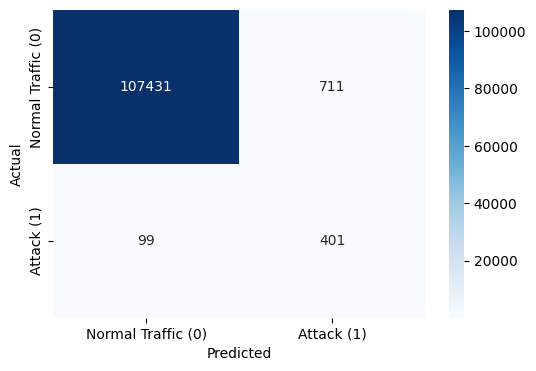

                precision    recall  f1-score   support

Normal Traffic       1.00      0.99      1.00    108142
        Attack       0.36      0.80      0.50       500

      accuracy                           0.99    108642
     macro avg       0.68      0.90      0.75    108642
  weighted avg       1.00      0.99      0.99    108642



In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Get predictions
y_pred = final_model.predict(X_test_adv_final)
y_pred = (y_pred > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test_adv_final, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal Traffic (0)', 'Attack (1)'], yticklabels=['Normal Traffic (0)', 'Attack (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.title('Confusion Matrix')
plt.show()

# Print detailed classification report
print(classification_report(y_test_adv_final, y_pred, target_names=['Normal Traffic', 'Attack']))


In [51]:
import numpy as np
import pandas as pd

# --- 1) Collect only the successfully flipped samples (1 → 0) ---
success_mask = zoo_attack_on_attacks["successes_bool"]
attacked_idx = zoo_attack_on_attacks["attacked_indices"]
successful_local_idx = np.array(attacked_idx)[success_mask]

# Standardized (model-space) originals + adversarials for those successes
X_orig_success_std = X_attack[successful_local_idx]
X_adv_success_std  = zoo_attack_on_attacks["X_adv"][successful_local_idx]

# Sanity: keep only those that truly flipped 1->0 according to the model
pred_orig = (final_model.predict(X_orig_success_std, verbose=0).ravel() > 0.5).astype(int)
pred_adv  = (final_model.predict(X_adv_success_std,  verbose=0).ravel() > 0.5).astype(int)

flip_mask = (pred_orig == 1) & (pred_adv == 0)
X_orig_success_std = X_orig_success_std[flip_mask]
X_adv_success_std  = X_adv_success_std[flip_mask]
pred_orig = pred_orig[flip_mask]
pred_adv  = pred_adv[flip_mask]

# --- 2) Inverse-transform back to original feature units ---
# scaler_full was fit on the selected columns used by the model (Xtr_sel)
X_orig_success = scaler_full.inverse_transform(X_orig_success_std)
X_adv_success  = scaler_full.inverse_transform(X_adv_success_std)

# --- 3) Build DataFrames with your desired columns and formatting ---
cols = ["wlan_radio.duration", "radiotap.dbm_antsignal", "wlan_radio.signal_dbm", "wlan_radio.data_rate"]

def make_df(X, preds):
    df = pd.DataFrame(X, columns=cols)
    return df

df_orig = make_df(X_orig_success, pred_orig)
df_adv  = make_df(X_adv_success,  pred_adv)

# --- 4) Show up to 10 examples in your exact format ---
n_show = min(10, len(df_orig))

print("Original Attack Samples (that later flipped 1→0):\n")
print(df_orig.head(n_show).to_string(index=True))

print("\nAdversarial Counterparts:\n")
print(df_adv.head(n_show).to_string(index=True))


Original Attack Samples (that later flipped 1→0):

   wlan_radio.duration  radiotap.dbm_antsignal  wlan_radio.signal_dbm  wlan_radio.data_rate
0                135.0                  -105.0                  -34.0              130.0000
1                119.0                  -104.0                  -34.0              156.0000
2                 59.0                  -168.0                  -56.0               72.2222
3                135.0                  -104.0                  -34.0              130.0000
4                111.0                  -165.0                  -55.0              173.3330
5                 48.0                  -190.0                  -64.0              173.3330
6                135.0                  -104.0                  -34.0              130.0000
7                135.0                  -104.0                  -34.0              130.0000
8                135.0                  -105.0                  -34.0              130.0000
9                135.0       